# 数据分析 

【探索性数据分析的基本面：】
- 定量分析展示
- 统计绘图与数据可视化 


【探索性数据分析的具体方法：】
- 数据基本概况（统计定量分析）
- 缺失值展示与探索
- 异常值和离群点展示与探索
- 目标变量重点分析
- 自变量逐变量分析（数值型、分类型、文本特征）
- 自变量目标变量相关分析
- 统计绘图与可视化展示 

## 一、实例：招聘数据的探索性数据分析

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./lagou_preprocessed.csv', encoding='utf-8', index_col=0)
data.head(3)

### 1.数据概况

In [ ]:
# 数据基本信息
data.info()

In [3]:
# 数值型变量统计量描述
data.describe()

,salary
count,1650.000000
mean,26248.484848
std,11581.745251
min,1500.000000
25%,20000.000000
50%,25000.000000
75%,32500.000000
max,80000.000000


### 2.目标变量分析

In [ ]:
# 目标变量统计量描述
data['salary'].describe()

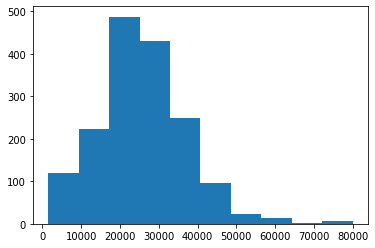

In [5]:
# 绘制目标变量的直方图，查看值分布
plt.hist(data['salary'])
plt.show()

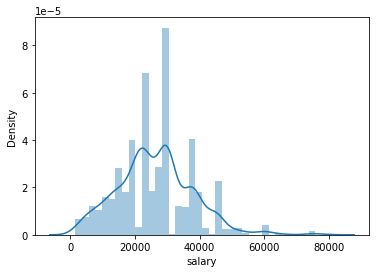

In [6]:
# seaborn下的直方图
import warnings
warnings.filterwarnings('ignore')
sns.distplot(data['salary']);

In [7]:
# 计算目标变量值的偏度与峰度
from scipy import stats
# from scipy.stats import norm

print("Skewness: %f" % data['salary'].skew())
print("Kurtosis: %f" % data['salary'].kurt())

Skewness: 0.491585
Kurtosis: 0.948933


偏度小于1，峰度小于3，所以目标变量右偏且瘦尾

In [ ]:
# 分类变量探索
# 分类值统计
cols = ['city', 'education', 'position_name', 'size', 'stage', 'work_year']
for col in cols:
    print(data[col].value_counts())

In [ ]:
# 处理city变量
# 将计数少于30的划为其他
city_counts= data["city"].value_counts()
city_counts_df = pd.DataFrame()
city_counts_df['city'] = city_counts.index
city_counts_df['counts'] = city_counts.values
city_counts_df

In [10]:
cities = ['北京', '上海', '广州', '深圳', '杭州', '成都', '武汉', '南京']
for i, j in enumerate(data['city']):
    if j not in cities:
        data['city'][i] = '其他'
    
data['city'].value_counts()

北京    869
上海    260
深圳    132
杭州    125
其他    101
广州     71
成都     31
武汉     31
南京     30
Name: city, dtype: int64

In [11]:
# 解决绘图中的中文字体显示问题
from pylab import *
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
mpl.rcParams['font.sans-serif'] = ['SimHei']

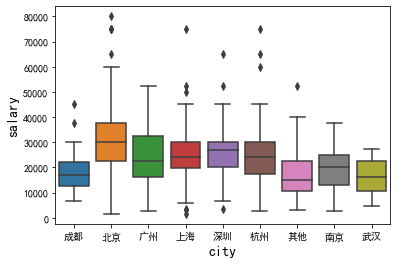

In [12]:
# 城市与工资水平
sns.boxplot(x = data['city'], y = data['salary']);

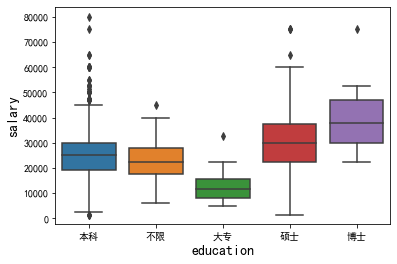

In [13]:
# 学历与工资水平
sns.boxplot(x = data['education'], y = data['salary']);

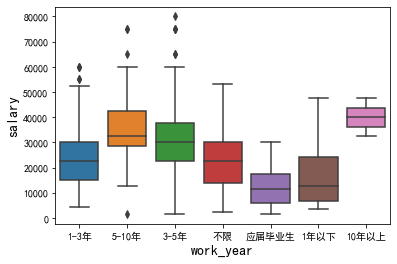

In [14]:
# 经验与工资水平
sns.boxplot(x = data['work_year'], y = data['salary']);

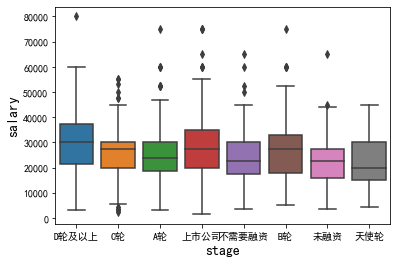

In [15]:
# 企业发展阶段与工资水平
sns.boxplot(x = data['stage'], y = data['salary']);

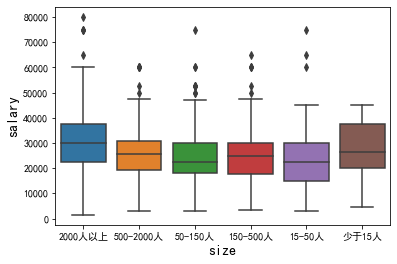

In [16]:
# 企业规模与工资水平
sns.boxplot(x = data['size'], y = data['salary']);

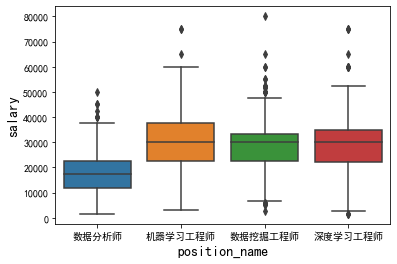

In [17]:
# 岗位与工资水平
sns.boxplot(x = data['position_name'], y = data['salary']);

In [18]:
data['industry']

0              O2O
1        移动互联网,O2O
2         移动互联网,金融
3       移动互联网,社交网络
4        广告营销,文化娱乐
           ...    
1645         移动互联网
1646         移动互联网
1647    移动互联网,企业服务
1648       数据服务,其他
1649    移动互联网,文化娱乐
Name: industry, Length: 1650, dtype: object

In [ ]:
# 处理industry变量
for i, j in enumerate(data['industry']):
    if ',' not in j:
        data['industry'][i] = j
    else:
        data['industry'][i] = j.split(',')[0]
        
data['industry'].value_counts()

In [20]:
industries = ['移动互联网', '金融', '数据服务', '电子商务', '企业服务', '医疗健康', 'O2O', '硬件', '信息安全', '教育']
for i, j in enumerate(data['industry']):
    if j not in industries:
        data['industry'][i] = '其他'
    
data['industry'].value_counts()

移动互联网    1022
其他        117
金融        115
数据服务       94
电子商务       77
企业服务       70
医疗健康       49
O2O        29
硬件         29
信息安全       28
教育         20
Name: industry, dtype: int64

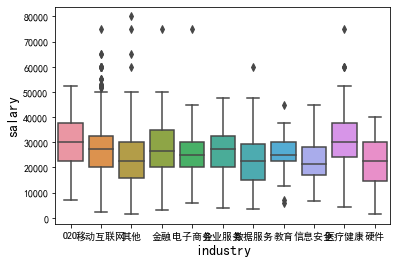

In [21]:
# 行业与工资水平
sns.boxplot(x = data['industry'], y = data['salary']);

In [ ]:
ADV = []
for i in data['advantage']:
    ADV.append(i)
    
ADV_text = ''.join(ADV)
ADV_text

In [ ]:
import jieba
result = jieba.cut(ADV_text)
print("切分结果:  "+",".join(result))

In [ ]:
jieba.suggest_freq(('五险一金'), True)
jieba.suggest_freq(('六险一金'), True)
jieba.suggest_freq(('带薪年假'), True)
jieba.suggest_freq(('年度旅游'), True)
jieba.suggest_freq(('氛围好'), True)
jieba.suggest_freq(('技术大牛'), True)
jieba.suggest_freq(('免费三餐'), True)
jieba.suggest_freq(('租房补贴'), True)
jieba.suggest_freq(('大数据'), True)
jieba.suggest_freq(('精英团队'), True)
jieba.suggest_freq(('晋升空间大'), True)

result = jieba.cut(ADV_text)
print("切分结果:  "+",".join(result))

In [ ]:
#读取标点符号库
f = open("./stopwords.txt", "r",encoding="utf-8")
stopwords={}.fromkeys(f.read().split("\n"))
f.close()
#加载用户自定义词典
# jieba.load_userdict("./utils/jieba_user_dict.txt")
segs = jieba.cut(ADV_text)
mytext_list=[]
#文本清洗
for seg in segs:
    if seg not in stopwords and seg != " " and len(seg) != 1:
        mytext_list.append(seg.replace(" ", ""))
        
ADV_cloud_text = ",".join(mytext_list)
ADV_cloud_text

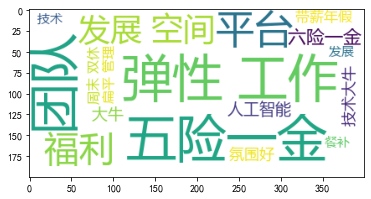

In [42]:
from wordcloud import WordCloud
wc = WordCloud(
    background_color="white", #背景颜色
    max_words=800, #显示最大词数
    font_path = r"C:\Windows\Fonts\微软雅黑\msyh.ttc", 
    min_font_size=15,
    max_font_size=60
    )
wc.generate(ADV_cloud_text)
wc.to_file("ADV_cloud.png")
plt.imshow(wc)
plt.show()

In [40]:
print(data.shape)
data.head(2)

(1650, 14)


,address,advantage,city,company_name,education,industry,industryLables,label,position_detail,position_name,salary,size,stage,work_year
0,"'科华北路', '桂溪', '四川大学'",工作氛围好,成都,达疆网络科技（上海）有限公司,本科,O2O,NaN,"'年底双薪', '绩效奖金', '岗位晋升', '定期体检'",职位描述：工作职责：?1、负责新零售业务的数据分析工作，挖掘数据分析需求，制定并实施分析方案...,数据分析师,15000.0,2000人以上,D轮及以上,1-3年
1,'未知',"六险二金,晋升通道,独当一面,话语权",北京,贝壳找房（北京）科技有限公司,本科,移动互联网,"'大数据', '商业'","'股票期权', '带薪年假', '绩效奖金', '扁平管理'",职位描述：工作职责:方向一、经营分析/指标体系1. 参与公司核心策略的数据分析，基于策略逻辑...,数据分析师,32500.0,2000人以上,C轮,5-10年


In [41]:
# 剔除几个无用变量
data2 = data.drop(['address', 'industryLables', 'company_name'], axis=1)
data2.to_csv('./lagou_data5.csv',encoding="utf-8")
print(data2.shape)
data2.head(3)

(1650, 11)


,advantage,city,education,industry,label,position_detail,position_name,salary,size,stage,work_year
0,工作氛围好,成都,本科,O2O,"'年底双薪', '绩效奖金', '岗位晋升', '定期体检'",职位描述：工作职责：?1、负责新零售业务的数据分析工作，挖掘数据分析需求，制定并实施分析方案...,数据分析师,15000.0,2000人以上,D轮及以上,1-3年
1,"六险二金,晋升通道,独当一面,话语权",北京,本科,移动互联网,"'股票期权', '带薪年假', '绩效奖金', '扁平管理'",职位描述：工作职责:方向一、经营分析/指标体系1. 参与公司核心策略的数据分析，基于策略逻辑...,数据分析师,32500.0,2000人以上,C轮,5-10年
2,五险一金,北京,不限,移动互联网,"'年底多薪', '岗位晋升', '定期体检', '五险一金'",职位描述：职位描述：1、收集、处理用户海量数据，挖掘用户行为特征，为产品、运营提供参考依据；...,数据分析师,12500.0,500-2000人,C轮,1-3年
